## description: This document focuses on retrieving evaluation results logged in Langfuse using the fetch_scores. category: Examples

---

# Fetching Scores from Langfuse

Example: Using UpTrain and Ragas for Model Evaluation and Retrieving Metrics from Langfuse
Langfuse makes it easy to log and retrieve model evaluation metrics, helping users analyze and compare various performance measures. In this example, we'll demonstrate how UpTrain and Ragas can be used to evaluate models and retrieve specific evaluation metrics logged into Langfuse using `fetch_scores()` function and verify these metrics extracted by creating comparisons using a correlation matrix.

**fetch_scores()** provides these arguments - 
 
- `page` (*Optional[int]*): The page number of the scores to return. Defaults to None.  
- `limit` (*Optional[int]*): The maximum number of scores to return. Defaults to None.  
- `user_id` (*Optional[str]*): A user identifier. Defaults to None.  
- `name` (*Optional[str]*): The name of the scores to return. Defaults to None.  
- `from_timestamp` (*Optional[dt.datetime]*): Retrieve only scores with a timestamp on or after this datetime. Defaults to None.  
- `to_timestamp` (*Optional[dt.datetime]*): Retrieve only scores with a timestamp before this datetime. Defaults to None.  
- `source` (*Optional[ScoreSource]*): The source of the scores. Defaults to None.  
- `operator` (*Optional[str]*): The operator of the scores. Defaults to None.  
- `value` (*Optional[float]*): The value of the scores. Defaults to None.  
- `score_ids` (*Optional[str]*): The score identifier. Defaults to None.  
- `config_id` (*Optional[str]*): The configuration identifier. Defaults to None.  
- `data_type` (*Optional[ScoreDataType]*): The data type of the scores. Defaults to None.  
- `request_options` (*Optional[RequestOptions]*): Additional request options. Defaults to None.  

The returned data contains a list of scores along with associated metadata, which can be useful for evaluating the performance of different models or experiments. If an error occurs during the request, it raises an exception, providing insight into what went wrong.

---

### 1. Setting up the environment

Importing necessary libraries and setting up enviornment variables

In [ ]:
!pip install ragas uptrain litellm datasets rouge_score langfuse

In [41]:
import os
# get keys for your project from https://cloud.langfuse.com
os.environ["LANGFUSE_PUBLIC_KEY"] = ""
os.environ["LANGFUSE_SECRET_KEY"] = ""
# your openai key
os.environ["OPENAI_API_KEY"] = ""

# Your host, defaults to https://cloud.langfuse.com
# For US data region, set to "https://us.cloud.langfuse.com"
os.environ["LANGFUSE_HOST"] = "https://us.cloud.langfuse.com"

### 2. Getting the data

This section demonstrates how to load and prepare a dataset for evaluation. The "amnesty_qa" dataset is loaded using the `datasets` library, and a subset of 5 evaluation examples is selected for analysis. The selected data is then converted into a pandas DataFrame for convenient handling and processing.

In [ ]:
from datasets import load_dataset

amnesty_qa = load_dataset("explodinggradients/amnesty_qa", "english_v2")
amnesty_qa_ragas = amnesty_qa["eval"].select(range(5))
amnesty_qa_ragas.to_pandas()

In [6]:
import pandas as pd
amnesty_qa_df = pd.DataFrame(amnesty_qa["eval"].select(range(5)))

,question,ground_truth,answer,contexts
0,What are the global implications of the USA Su...,The global implications of the USA Supreme Cou...,The global implications of the USA Supreme Cou...,"[- In 2022, the USA Supreme Court handed down ..."
1,Which companies are the main contributors to G...,"According to the Carbon Majors database, the m...","According to the Carbon Majors database, the m...","[In recent years, there has been increasing pr..."
2,Which private companies in the Americas are th...,The largest private companies in the Americas ...,"According to the Carbon Majors database, the l...",[The issue of greenhouse gas emissions has bec...
3,What action did Amnesty International urge its...,Amnesty International urged its supporters to ...,Amnesty International urged its supporters to ...,"[In the case of the Ogoni 9, Amnesty Internati..."
4,What are the recommendations made by Amnesty I...,The recommendations made by Amnesty Internatio...,Amnesty International made several recommendat...,"[In recent years, Amnesty International has fo..."


In [7]:
amnesty_qa_df['response'] = amnesty_qa_df['answer']
amnesty_qa_df.rename(columns={'contexts':'context'}, inplace=True)

,question,ground_truth,answer,context,response
0,What are the global implications of the USA Su...,The global implications of the USA Supreme Cou...,The global implications of the USA Supreme Cou...,"[- In 2022, the USA Supreme Court handed down ...",The global implications of the USA Supreme Cou...
1,Which companies are the main contributors to G...,"According to the Carbon Majors database, the m...","According to the Carbon Majors database, the m...","[In recent years, there has been increasing pr...","According to the Carbon Majors database, the m..."
2,Which private companies in the Americas are th...,The largest private companies in the Americas ...,"According to the Carbon Majors database, the l...",[The issue of greenhouse gas emissions has bec...,"According to the Carbon Majors database, the l..."
3,What action did Amnesty International urge its...,Amnesty International urged its supporters to ...,Amnesty International urged its supporters to ...,"[In the case of the Ogoni 9, Amnesty Internati...",Amnesty International urged its supporters to ...
4,What are the recommendations made by Amnesty I...,The recommendations made by Amnesty Internatio...,Amnesty International made several recommendat...,"[In recent years, Amnesty International has fo...",Amnesty International made several recommendat...


### 3. Evaluation with UpTrain

This code demonstrates how to evaluate a dataset using UpTrain's `EvalLLM` class. An instance of `EvalLLM` is created using the OpenAI API key. The `evaluate` function assesses the `amnesty_qa_df` DataFrame against three evaluation criteria: context relevance, factual accuracy, and response completeness. The evaluation results are stored in a new DataFrame, which is then printed and optionally saved as a CSV file. Finally, the function is called in the main block to execute the evaluation and store the results. Refer a detailed version [here](https://langfuse.com/guides/cookbook/evaluation_with_uptrain)

In [28]:
import os
import json
import pandas as pd
from uptrain import EvalLLM, Evals

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

def evaluate():
    # Step 5: Evaluate data using UpTrain
    results = eval_llm.evaluate(
        data=amnesty_qa_df,
        checks=[Evals.CONTEXT_RELEVANCE, Evals.FACTUAL_ACCURACY, Evals.RESPONSE_COMPLETENESS]
    )

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)

    # Print the DataFrame
    print(results_df)

    # Optionally, save the DataFrame to a CSV file
    results_df.to_csv('evaluation_results.csv', index=False)

    return results_df

# Call the function and store results in a DataFrame
if __name__ == "__main__":
    uptrain_df = evaluate()

100%|██████████| 5/5 [00:02<00:00,  2.25it/s]
2024-10-13 16:50:32.097 | INFO     | uptrain.framework.evalllm:evaluate:376 - Local server not running, start the server to log data and visualize in the dashboard!


                                            question  \
0  What are the global implications of the USA Su...   
1  Which companies are the main contributors to G...   
2  Which private companies in the Americas are th...   
3  What action did Amnesty International urge its...   
4  What are the recommendations made by Amnesty I...   

                                        ground_truth  \
0  The global implications of the USA Supreme Cou...   
1  According to the Carbon Majors database, the m...   
2  The largest private companies in the Americas ...   
3  Amnesty International urged its supporters to ...   
4  The recommendations made by Amnesty Internatio...   

                                              answer  \
0  The global implications of the USA Supreme Cou...   
1  According to the Carbon Majors database, the m...   
2  According to the Carbon Majors database, the l...   
3  Amnesty International urged its supporters to ...   
4  Amnesty International made several recommen

### 4. Evaluation with Ragas

The `evaluate` function is called with the selected evaluation data and a list of metrics, including context precision, faithfulness, and answer relevancy. The results from the evaluation are then converted into a Pandas DataFrame for easier analysis. This approach enables users to assess the quality of model responses based on specific criteria. For more detailed information on evaluating RAG models with Ragas visit [here](https://langfuse.com/guides/cookbook/evaluation_of_rag_with_ragas).

In [ ]:
import json
from ragas import evaluate
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_precision,
)

ragas_result = evaluate(
    amnesty_qa["eval"].select(range(5)),
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
    ],
)

ragas_df = ragas_result.to_pandas()

### 5. Setting Up Langfuse Client

This code snippet initializes a Langfuse client using the `Langfuse` class. The client is configured with a secret key, public key, and host URL, which are retrieved from the environment variables. This setup allows users to interact with the Langfuse API for logging and analyzing model evaluation metrics seamlessly.

In [42]:
from langfuse import Langfuse
langfuse_client = Langfuse(
    secret_key=os.environ.get("LANGFUSE_SECRET_KEY"),
    public_key=os.environ.get("LANGFUSE_PUBLIC_KEY"),
    host = os.environ.get("LANGFUSE_HOST")
)

### 6. Logging Evaluation Scores to Langfuse

The functions `log_uptrain_scores_to_langfuse` and `log_ragas_scores_to_langfuse` log evaluation scores from the UpTrain and Ragas frameworks into Langfuse. Each function iterates through its respective DataFrame, extracting relevant score columns and logging them with `langfuse_client.score`, using a unique ID for each entry.

Scores in Langfuse are objects for storing evaluation metrics, linked to traces and optional observations. Each score can include attributes such as name, value, trace ID, and configuration ID to ensure they comply with a specified schema. This structured approach enables effective analysis of evaluation metrics within the Langfuse platform. 

#### Key Attributes of a Score Object:
- **name**: Name of the score (e.g., user_feedback).
- **value**: Numeric value of the score.
- **traceId**: ID of the related trace.
- **id**: Unique identifier for the score.

Using scores effectively allows for quick overviews of evaluations, segmentation of traces by quality, and detailed reporting across use cases. Score schemas can be defined to standardize metrics for consistency and comparability in analysis.

In [24]:
def log_uptrain_scores_to_langfuse(uptrain_df):
    """Log evaluation scores to Langfuse."""
    score_columns = ['score_factual_accuracy', 'score_context_relevance', 'score_response_completeness']
    for index, row in uptrain_df.iterrows():
        for score_name in score_columns:
            score_value = row[score_name]
            langfuse_client.score(id=f"Uptrain_{index}_{score_name}", value=score_value, name=score_name)

In [35]:
def log_ragas_scores_to_langfuse(ragas_df):
  score_columns = ['context_precision', 'faithfulness', 'answer_relevancy']

  for index, row in ragas_df.iterrows():
      for score_name in score_columns:
          score_value = row[score_name]
          langfuse_client.score(id=f"Ragas_{index}_{score_name}", value=score_value, name=score_name)

In [43]:
log_ragas_scores_to_langfuse(ragas_df)
log_uptrain_scores_to_langfuse(uptrain_df)

### 7. Fetching Scores from Langfuse

The `fetch_scores_from_langfuse` function retrieves evaluation scores from Langfuse based on the specified score name. It utilizes the `fetch_scores` method from the Langfuse client to obtain a comprehensive list of scores that have been logged in the system. This function is particularly useful for users who want to analyze specific evaluation metrics associated with their models or applications.

By using the `fetch_scores` method, the function provides flexibility through various optional parameters that allow users to filter the retrieved scores according to their needs. For instance, users can specify pagination options such as the page number and the limit on the number of scores returned, making it easier to handle large datasets without overwhelming the interface.

In addition to pagination, the function supports filtering scores by criteria like user identifiers, timestamps, and score sources. This means users can fetch scores that were recorded by specific users or during a certain time frame, allowing for a more focused analysis. Users can also filter scores based on their values or specific configurations, ensuring that the retrieved data aligns with the evaluation metrics of interest.

The result of this function is a `FetchScoresResponse`, which includes not only the list of scores but also metadata about the scores retrieved. This allows users to quickly gain insights into the evaluation metrics relevant to their projects and make informed decisions based on the data. Overall, this function enhances the usability of Langfuse by simplifying the process of accessing and analyzing evaluation scores.

In [45]:
def fetch_scores_from_langfuse(score_name):
    """Fetch scores from Langfuse based on score name."""
    # Fetch scores for the specified name from Langfuse
    scores_fetched = langfuse_client.fetch_scores(name=score_name)
    return scores_fetched

In [75]:
score_columns = [ 'score_context_relevance', 'score_factual_accuracy', 'score_response_completeness', 'context_precision', 'faithfulness', 'answer_relevancy']

scores_df = pd.DataFrame(columns=score_columns)

for score_name in score_columns:
    fetch_scores = fetch_scores_from_langfuse(score_name)
    print(fetch_scores.data)
    scores_df[score_name] = [score.value for score in fetch_scores.data[::-1]]

[Score_Numeric(value=1.0, id='Uptrain_4_score_context_relevance', trace_id='95ad7bdd-b93b-4905-a865-938f346871bd', name='score_context_relevance', source=<ScoreSource.API: 'API'>, observation_id=None, timestamp=datetime.datetime(2024, 10, 13, 16, 59, 25, 177000, tzinfo=datetime.timezone.utc), created_at=datetime.datetime(2024, 10, 13, 16, 59, 25, 177000, tzinfo=datetime.timezone.utc), updated_at=datetime.datetime(2024, 10, 13, 16, 59, 25, 177000, tzinfo=datetime.timezone.utc), author_user_id=None, comment=None, config_id=None, data_type='NUMERIC', stringValue=None, trace={'userId': None}, projectId='cm1vkhmj40jxlhaue9mntmwk8'), Score_Numeric(value=1.0, id='Uptrain_3_score_context_relevance', trace_id='f9b43538-77b6-478f-a5d9-c2be3b4cdada', name='score_context_relevance', source=<ScoreSource.API: 'API'>, observation_id=None, timestamp=datetime.datetime(2024, 10, 13, 16, 59, 24, 897000, tzinfo=datetime.timezone.utc), created_at=datetime.datetime(2024, 10, 13, 16, 59, 24, 897000, tzinfo=d

### 8. Creating a Correlation Heatmap

This section illustrates how to visualize the correlation between evaluation scores using a heatmap. The code calculates the correlation matrix for two sets of scores: UpTrain scores (`'score_context_relevance'`, `'score_factual_accuracy'`, and `'score_response_completeness'`) and RAGAS scores (`'context_precision'`, `'faithfulness'`, and `'answer_relevancy'`).

1. **Calculate the Correlation Matrix**: The `corr()` function computes correlation coefficients between specified score columns in the `scores_df` DataFrame, indicating the strength and direction of relationships.

2. **Create and Customize the Heatmap**: A heatmap is generated using Matplotlib and Seaborn, displaying correlation coefficients with colors ranging from blue (negative) to red (positive). The layout is adjusted for clarity.

This visualization helps identify patterns in the evaluation metrics, aiding in the analysis of `fetch_scores()` performance.

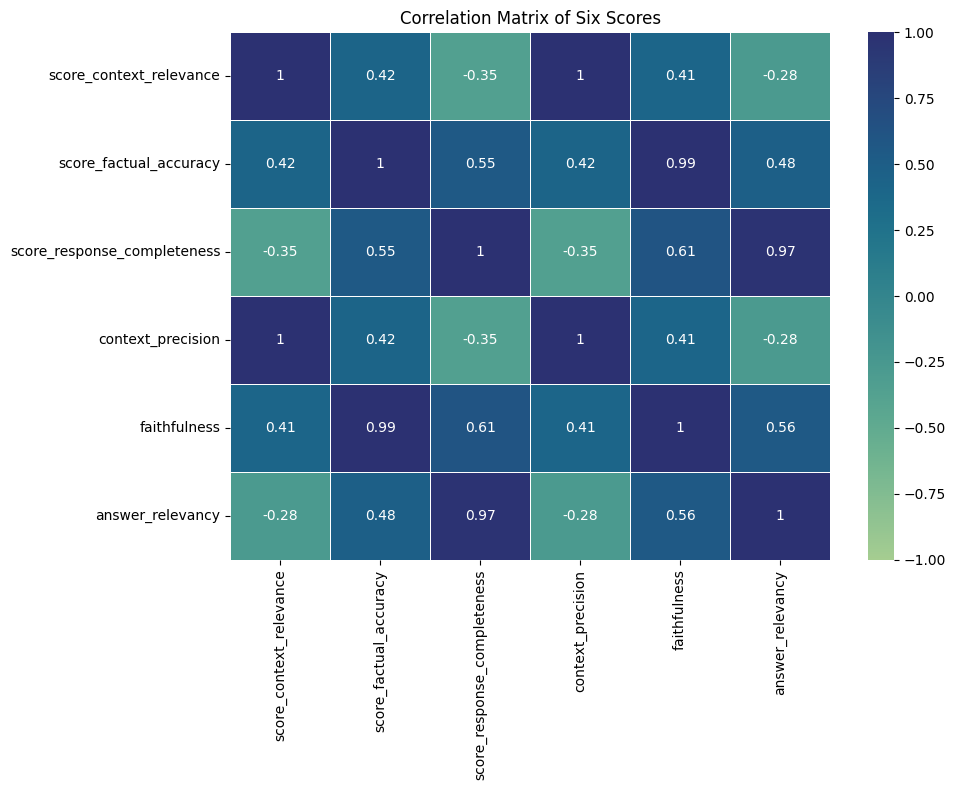

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = scores_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center=0, linewidths=.5, linecolor='white', cmap='crest')
plt.title('Correlation Matrix of Six Scores')
plt.tight_layout()

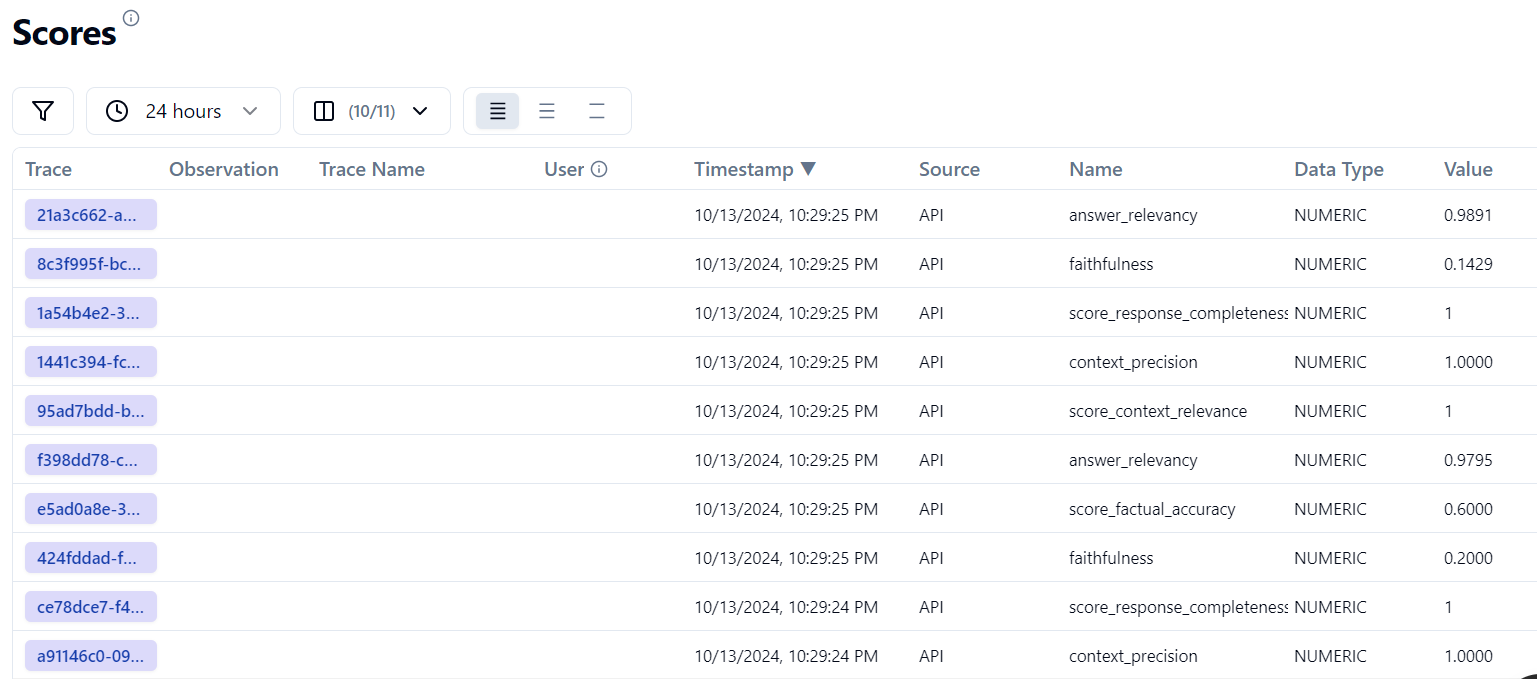